In [2]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.dummy import DummyForecaster
from sktime.forecasting.exp_smoothing import ExpSmoothingForecaster
from sktime.forecasting.model_selection import RollingWindowSplit

from sktime.forecasting.tests.test_base_api_all_forecasters import compute_expected_index_from_update_predict

import numpy as np
import pandas as pd

/Users/mloning/.conda/envs/sktime-fork/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/mloning/.conda/envs/sktime-fork/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/mloning/.conda/envs/sktime-fork/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.prepro

In [3]:
# n_timepoints = 30
# n_train = 20
# s = pd.Series(np.arange(n_timepoints))
# y_train = s.iloc[:n_train]
# y_test = s.iloc[n_train:]

# f = ExponentialSmoothing(y_train)
# ff = f.fit()

# ff.predict(start=20, end=30)

In [4]:
n_timepoints = 30
n_train = 13
s = pd.Series(np.random.random(size=(n_timepoints,)), index=np.arange(n_timepoints) + 10)
y_train = s.iloc[:n_train]
y_test = s.iloc[n_train:]

# forecaster = ThetaForecaster
forecaster = ExpSmoothingForecaster
step_length = 5
window_length = 3
fh = np.arange(1, 5)

cv = RollingWindowSplit(fh, window_length=window_length, step_length=step_length)
f = forecaster()
f.fit(y_train, fh)

f._obs_horizon.values

/Users/mloning/.conda/envs/sktime-fork/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22])

In [13]:
y_train.index

Int64Index([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22], dtype='int64')

In [5]:
f._get_absolute_fh()

array([13, 14, 15, 16])

In [4]:
for new in f._iter(y_test, cv):
    print(new.values)

[22 23 24]


In [5]:
f.update(y_test[new])
f._obs_horizon.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 22, 23, 24])

In [6]:
f.predict()

/Users/mloning/.conda/envs/sktime-fork/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:293: FutureWarning: RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead
  stop = base_index._start + (key + 1) * base_index._step
/Users/mloning/.conda/envs/sktime-fork/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:293: FutureWarning: RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead
  stop = base_index._start + (key + 1) * base_index._step
/Users/mloning/.conda/envs/sktime-fork/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:294: FutureWarning: RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead
  index = RangeIndex(start=base_index._start,
/Users/mloning/.conda/envs/sktime-fork/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:296: FutureWarning: RangeIndex._step is deprecated and will be removed

47    24.0
48    24.0
49    24.0
50    24.0
dtype: float64

In [7]:
fh_abs = f._get_absolute_fh()
fh_abs

array([25, 26, 27, 28])

In [8]:
f._fitted_estimator.predict(start=fh_abs[0], end=fh_abs[-1])

47    24.0
48    24.0
49    24.0
50    24.0
dtype: float64

In [9]:
f._fitted_estimator.predict(start=1, end=4)

23    22.0
24    23.0
25    24.0
26    24.0
dtype: float64

In [21]:
y_pred = f.update_predict(y_test, cv=cv)
y_pred

,19,24
20,20.0,NaN
21,20.5,NaN
22,21.0,NaN
23,21.5,20.0
24,NaN,20.5
25,NaN,21.0
26,NaN,21.5


In [7]:
y_pred = f.update_predict(y_test, cv=cv)

# check time index
pred_index = y_pred.index.values
expected_index = compute_expected_index_from_update_predict(y_test, f.fh, step_length)
np.testing.assert_array_equal(pred_index, expected_index)

AssertionError: 
Arrays are not equal

(shapes (7,), (8,) mismatch)
 x: array([20, 21, 22, 23, 24, 25, 26])
 y: array([20, 21, 22, 23, 25, 26, 27, 28])

In [8]:
y_pred

,19,24
20,20.0,NaN
21,20.5,NaN
22,21.0,NaN
23,21.5,20.0
24,NaN,20.5
25,NaN,21.0
26,NaN,21.5


In [9]:
expected_index

array([20, 21, 22, 23, 25, 26, 27, 28])

In [10]:
f = DummyForecaster()
f.fit(y_train)
f.update_predict(y_test, cv=cv)

,19,24
20,19.0,NaN
21,19.0,NaN
22,19.0,NaN
23,19.0,NaN
25,NaN,24.0
26,NaN,24.0
27,NaN,24.0
28,NaN,24.0


In [3]:
f = ThetaForecaster()
# f = DummyForecaster()
f.fit(y_train)
fh = np.array([1, 2, 3])
cv = RollingWindowSplit(fh=fh, window_length=3)
f.update_predict(y_test, cv=cv)

,19,20,21,22,23,24,25,26
20,0.59875,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,0.59543,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,0.59211,0.61385,NaN,NaN,NaN,NaN,NaN,NaN
23,NaN,0.61385,NaN,NaN,NaN,NaN,NaN,NaN
24,NaN,0.61385,0.61385,NaN,NaN,NaN,NaN,NaN
25,NaN,NaN,0.61385,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,0.61385,0.61385,NaN,NaN,NaN,NaN
27,NaN,NaN,NaN,0.61385,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,0.61385,0.61385,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,0.61385,NaN,NaN,NaN


## Simple time series forecasting with `sktime`

`sktime` comes with several forecasting algorithms sharing a common interface.

Forecasters are trained on a single series of data and make predictions within the provided forecast horizon.

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
from sktime.datasets import load_airline
from sktime.forecasters import *
import numpy as np
import warnings

warnings.simplefilter('ignore', FutureWarning)
sns.set(style="darkgrid", palette="colorblind")

<IPython.core.display.Javascript object>


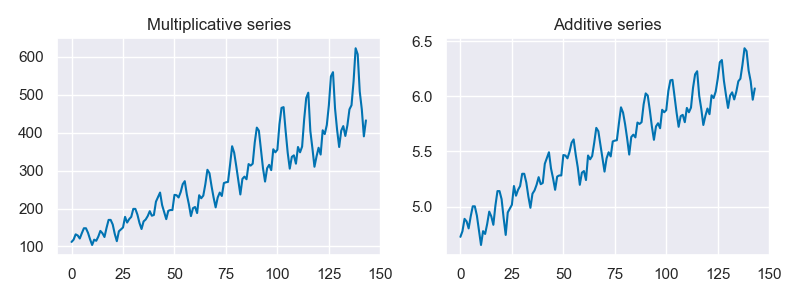

In [3]:
airline = load_airline()
ln_airline = np.log1p(airline)

fig, axes = plt.subplots(1, 2, figsize=(8, 3))
airline.plot(ax=axes[0], title="Multiplicative series")
ln_airline.plot(ax=axes[1], title="Additive series")
fig.tight_layout()

In [7]:


def do_forecast(ts, fcstr, test_size=20):
    train, test = ts[:-test_size], ts[-test_size:]
    train.name = ts.name + " (train)"
    test.name = ts.name + " (test)"
    
    # Forecast horizons should be an array starting at 1
    fh = np.arange(len(test)) + 1
    
    if isinstance(fcstr, DummyForecaster):
        fcstr.fit(train, fh=fh)
    else:
        fcstr.fit(train)
    
    fcstr.plot(fh=fh, y_train=train, y_true=test)

In [8]:
theta = ThetaForecaster(seasonal_periods=12)
%time _ = do_forecast(ln_airline, theta)

NameError: name 'ThetaForecaster' is not defined

<IPython.core.display.Javascript object>


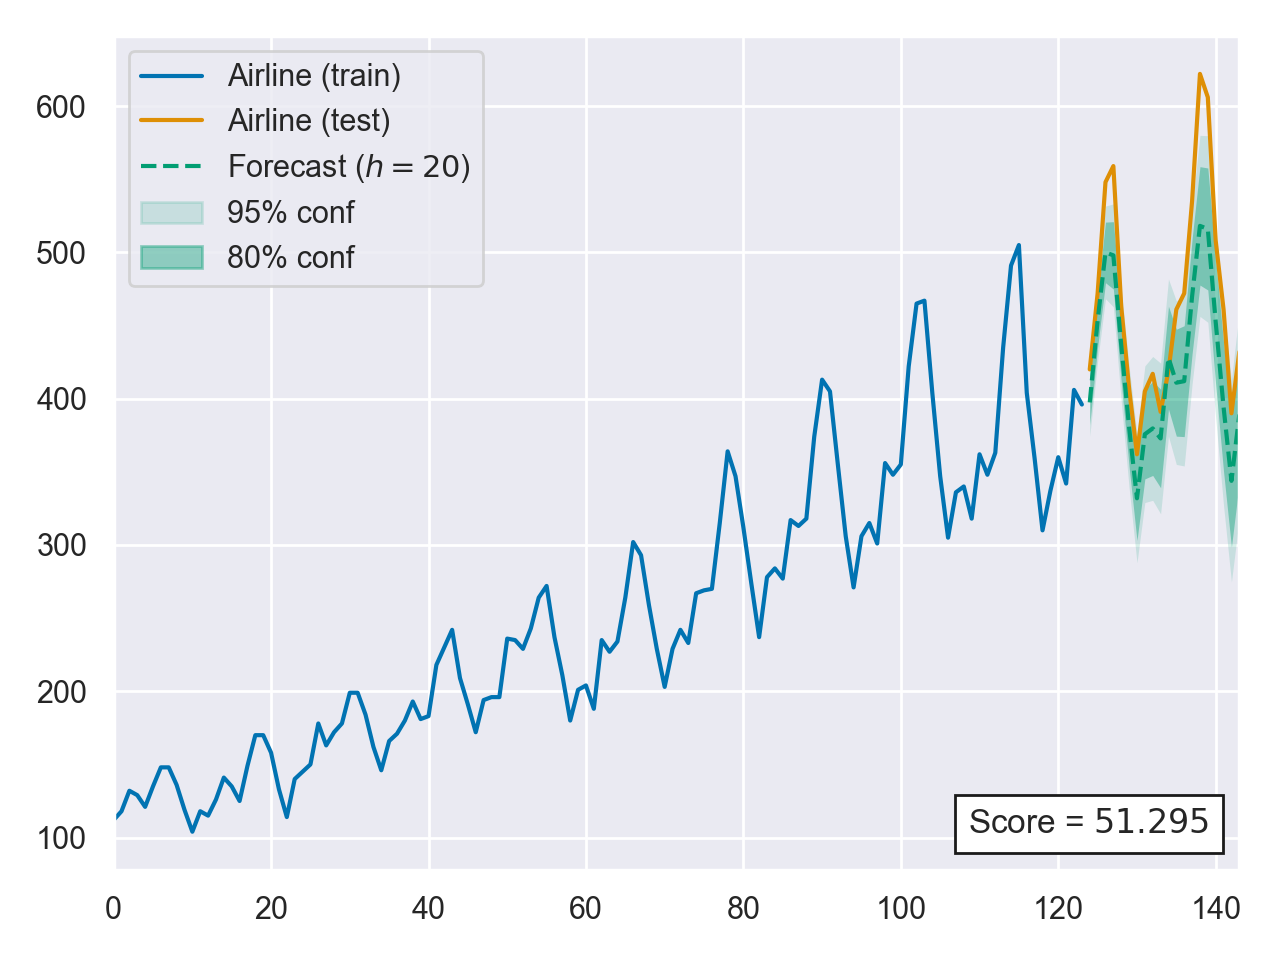

CPU times: user 286 ms, sys: 112 ms, total: 398 ms
Wall time: 212 ms


In [5]:
theta2 = ThetaForecaster(seasonal_periods=12)
%time _ = do_forecast(airline, theta2)

<IPython.core.display.Javascript object>


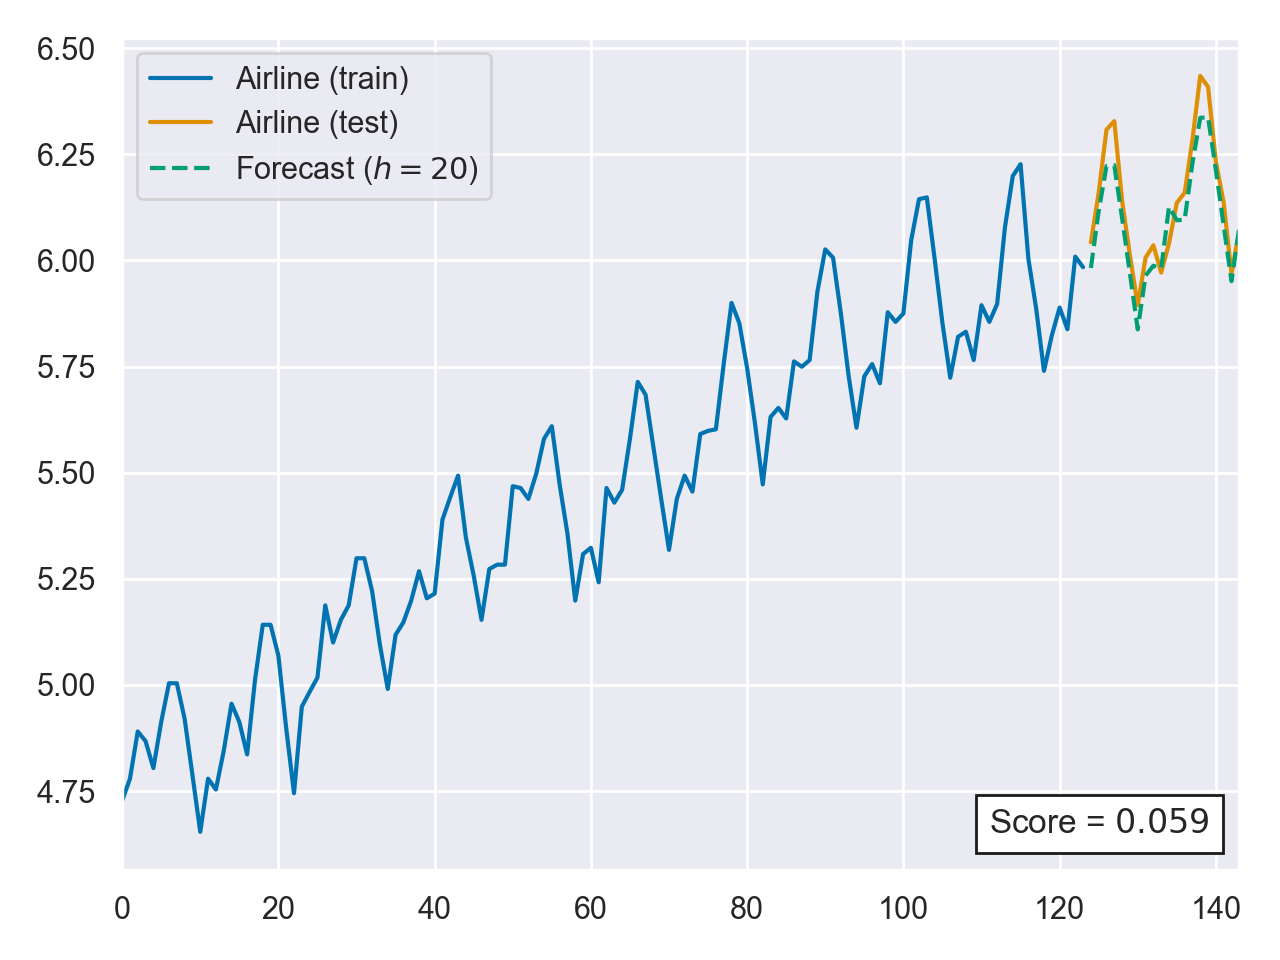

CPU times: user 365 ms, sys: 106 ms, total: 471 ms
Wall time: 270 ms


In [6]:
ses = ExpSmoothingForecaster(trend='add', seasonal='add', seasonal_periods=12)
%time _ = do_forecast(ln_airline, ses)

<IPython.core.display.Javascript object>


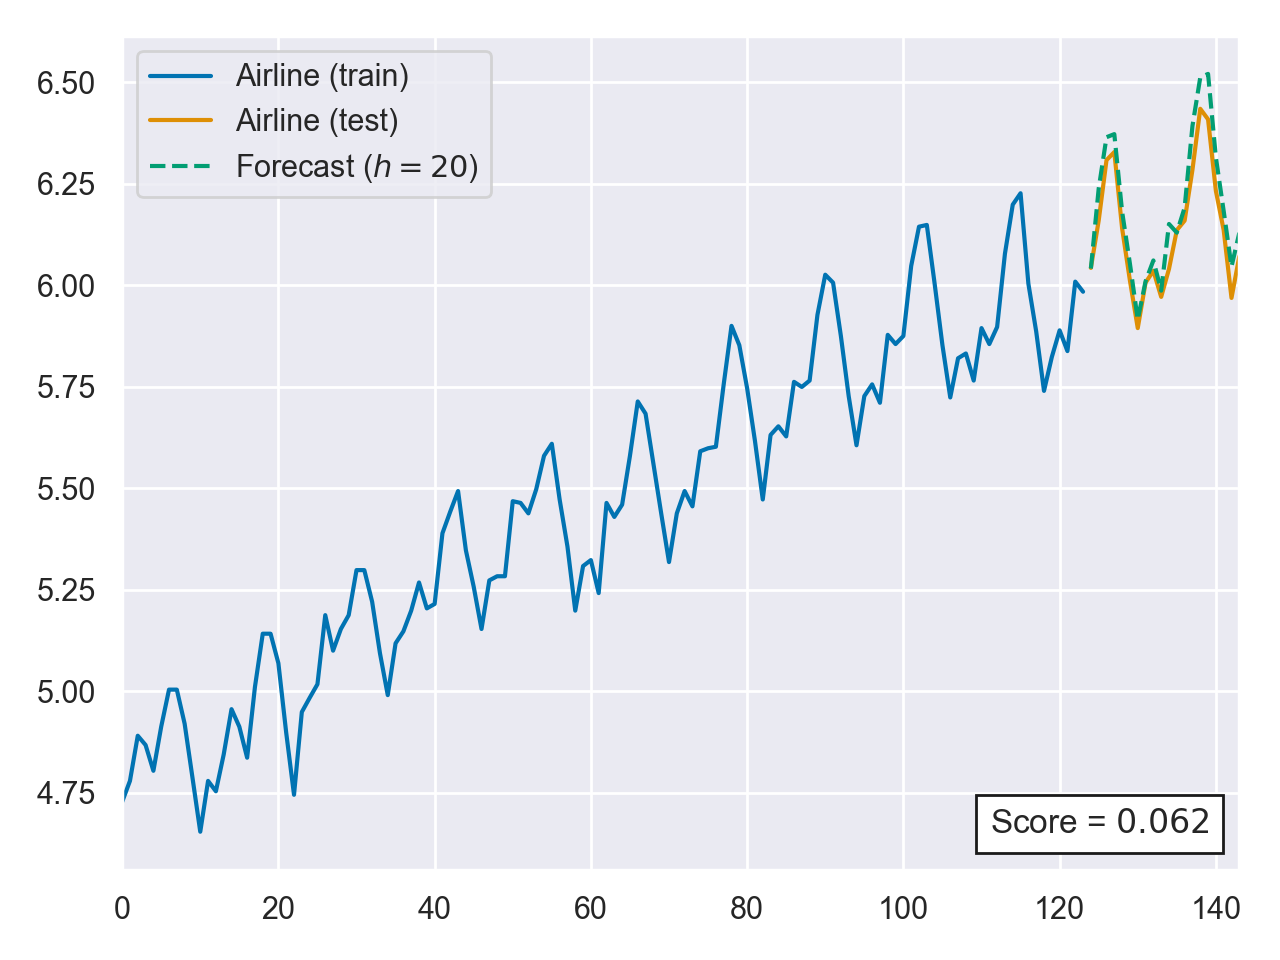

CPU times: user 1min 37s, sys: 1min 38s, total: 3min 15s
Wall time: 26.3 s


In [7]:
arima321 = ARIMAForecaster(seasonal_order=(3, 2, 1, 12))
%time _ = do_forecast(ln_airline, arima321)

In [6]:
%time _ = do_forecast(ln_airline, DummyForecaster('last', sp=12))

NameError: name 'do_forecast' is not defined